# Project Name: Bike Rental Count Prediction

## BackGround:


### Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

### The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

## Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading the Data Set

In [2]:
df= pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Understanding the Data Set

### The Data Set contains the following information:
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Data Analysis 

In [5]:
df.shape

(731, 16)

In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Let us rename the colums for a better understanding

In [7]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [8]:
df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Let us convert our Data types of variables to the significant category

In [9]:
df['datetime']=pd.to_datetime(df.datetime)
df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')

In [10]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [11]:
df.describe()

,rec_id,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


## Handling Missing Values

In [12]:
df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

### Let us see how the different months and seasons affect the rental counts

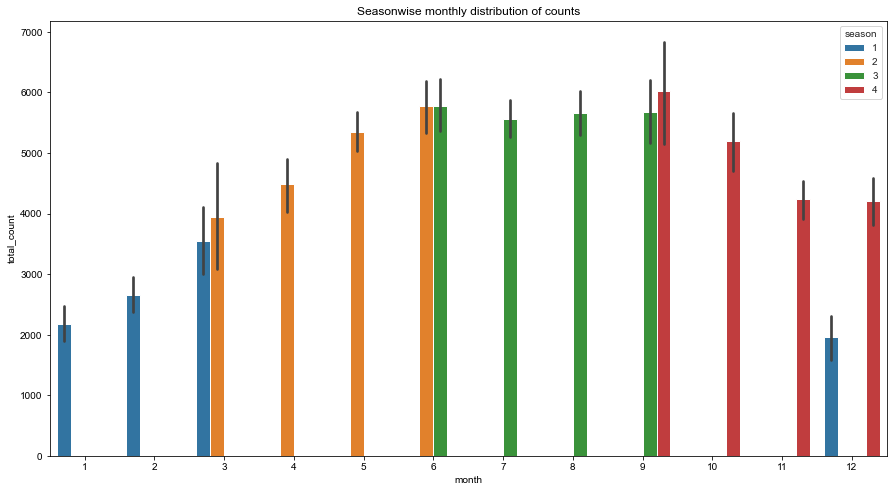

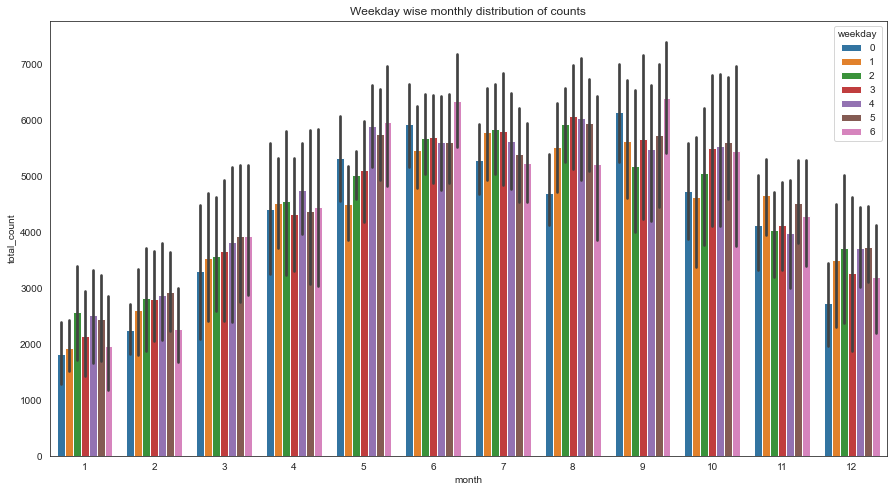

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

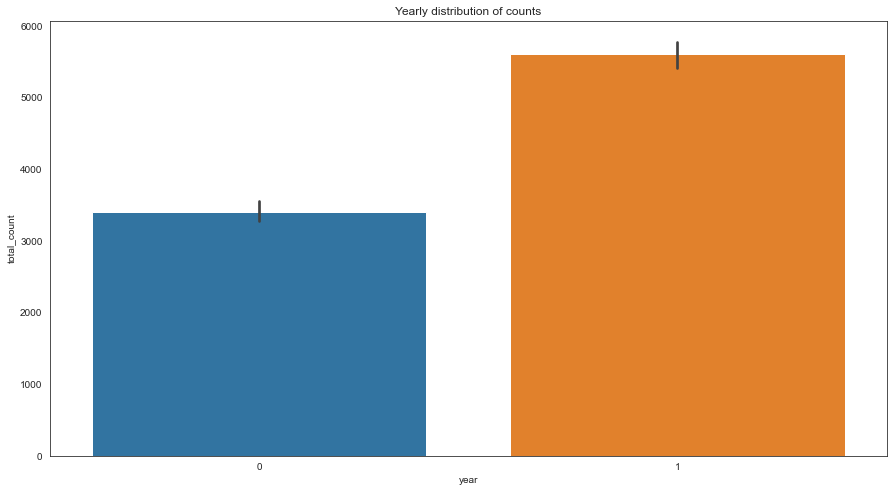

In [14]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.barplot(x='year',y='total_count',data=df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

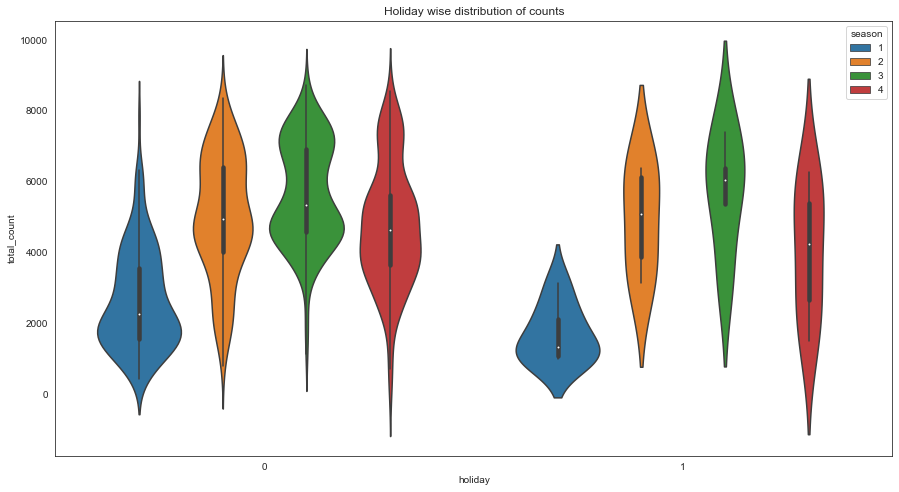

In [15]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.violinplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

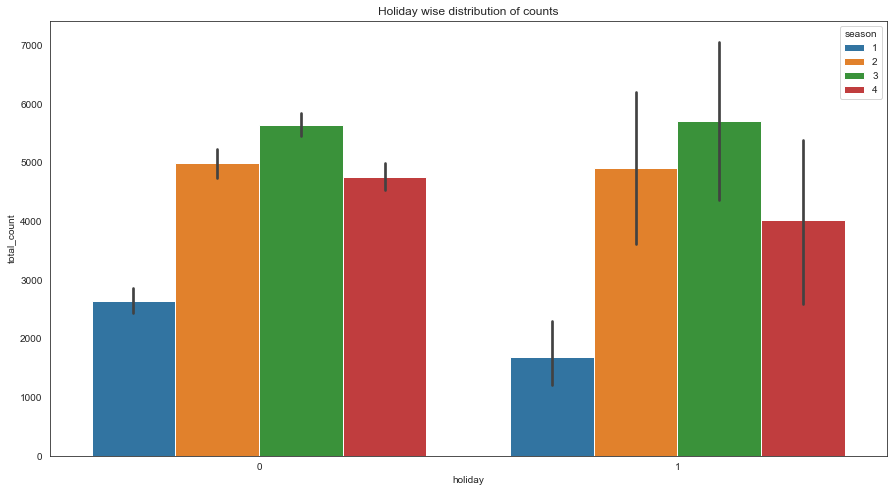

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

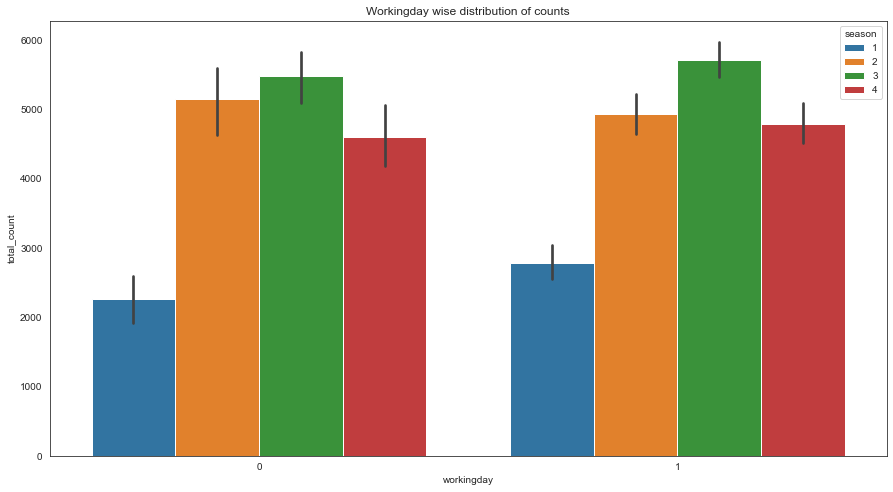

In [17]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

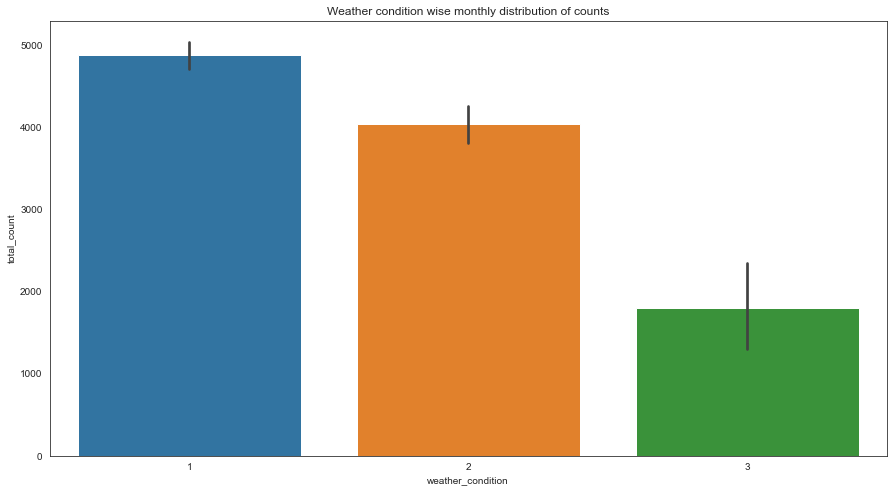

In [18]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather condition wise monthly distribution of counts')
plt.show()

### Outlier Analysis

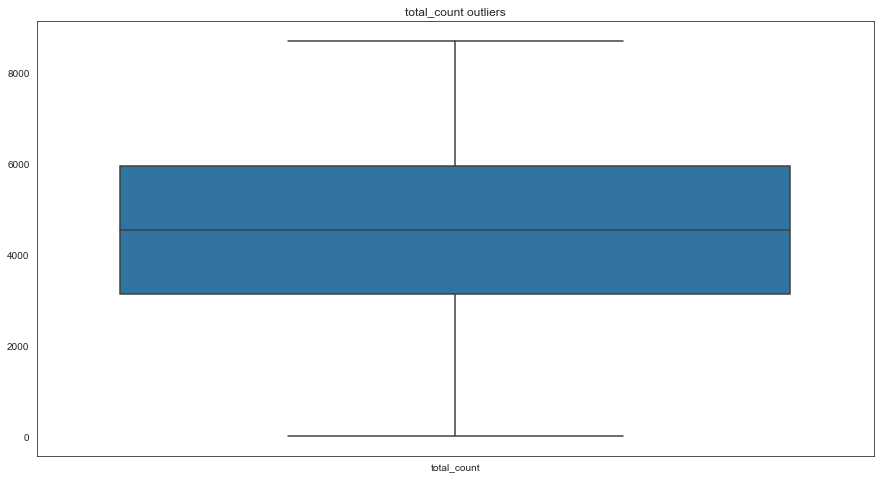

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

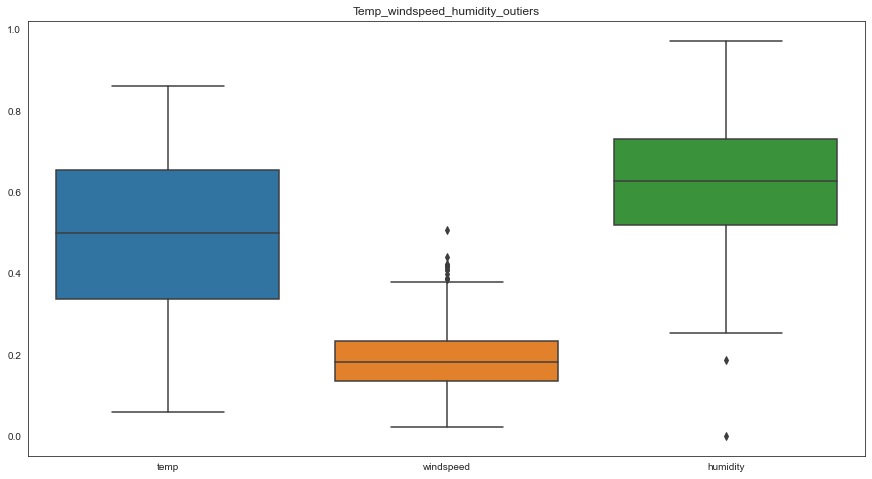

In [20]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

### Plotting Q-Q Plot

In [21]:
import scipy.stats as stat
import pylab

In [22]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

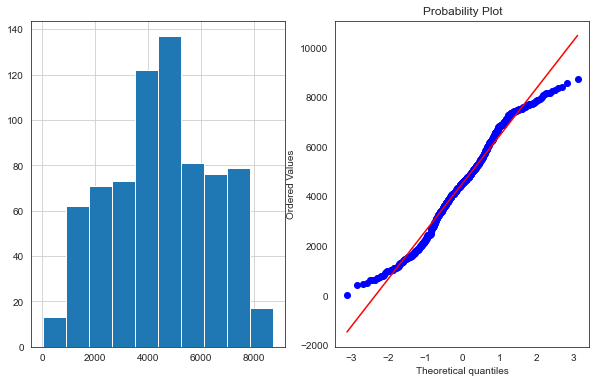

In [23]:
plot_curve(df,'total_count')

### Co Relation Matrix

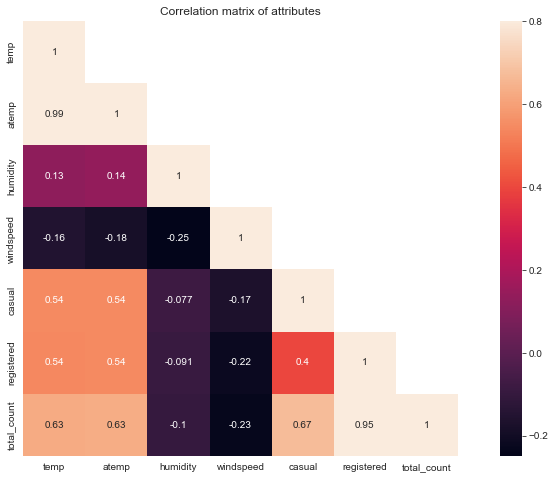

In [24]:
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

### Data Pre Processing

In [25]:
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

### One Hot Encoding

In [30]:
encoded_df =pd.get_dummies(df,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_df.shape)
encoded_df.head()

Shape of transfomed dataframe:: (731, 24)


,rec_id,datetime,month,weekday,temp,atemp,humidity,windspeed,casual,registered,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,2011-01-01,1,6,0.344167,0.363625,0.805833,0.160446,331,654,...,False,True,False,True,False,False,True,False,True,False
1,2,2011-01-02,1,0,0.363478,0.353739,0.696087,0.248539,131,670,...,False,True,False,True,False,False,True,False,True,False
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,False,True,False,False,True,True,False,False,True,False
3,4,2011-01-04,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,...,False,True,False,False,True,True,False,False,True,False
4,5,2011-01-05,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,...,False,True,False,False,True,True,False,False,True,False


In [31]:
encoded_df=encoded_df.drop('datetime',axis=1)

In [32]:
encoded_df

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,...,False,True,False,True,False,False,True,False,True,False
1,2,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,False,True,False,True,False,False,True,False,True,False
2,3,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,False,True,False,False,True,True,False,False,True,False
3,4,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,False,True,False,False,True,True,False,False,True,False
4,5,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,False,True,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12,4,0.254167,0.226642,0.652917,0.350133,247,1867,2114,...,False,True,False,False,True,False,True,False,False,True
727,728,12,5,0.253333,0.255046,0.590000,0.155471,644,2451,3095,...,False,True,False,False,True,False,True,False,False,True
728,729,12,6,0.253333,0.242400,0.752917,0.124383,159,1182,1341,...,False,True,False,True,False,False,True,False,False,True
729,730,12,0,0.255833,0.231700,0.483333,0.350754,364,1432,1796,...,False,True,False,True,False,True,False,False,False,True


In [33]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [34]:
x= encoded_df.iloc[:,0:-1] ## Independent Features
y= encoded_df.iloc[:,-1] ## Dependent Varibales

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [36]:
X_train

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0
223,224,8,5,0.708333,0.654042,0.415000,0.125621,1051,3854,4905,...,True,False,True,False,False,True,True,False,False,True
684,685,11,4,0.321667,0.324492,0.620417,0.152987,320,5125,5445,...,False,True,True,False,False,True,False,True,False,False
685,686,11,5,0.345000,0.347204,0.524583,0.171025,484,5214,5698,...,False,True,True,False,False,True,True,False,False,False
163,164,6,1,0.635000,0.601654,0.494583,0.305350,863,4157,5020,...,False,False,True,False,False,True,True,False,False,True
394,395,1,1,0.269167,0.262625,0.400833,0.215792,126,3498,3624,...,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,3,0,0.384348,0.380091,0.527391,0.270604,982,1435,2417,...,False,False,True,False,True,False,True,False,False,True
106,107,4,0,0.456667,0.445696,0.479583,0.303496,1558,2186,3744,...,False,False,True,False,True,False,True,False,False,True
270,271,9,3,0.635000,0.575158,0.848750,0.148629,480,3427,3907,...,False,True,True,False,False,True,False,True,False,True
435,436,3,0,0.361739,0.359670,0.476957,0.222587,1658,3253,4911,...,False,False,True,False,True,False,True,False,False,False


### Our data is ready for Model Building

## Model Building

### We will be using the following models in our project:
- Linear Regression
- Random Forest Regressor

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linreg= LinearRegression()

In [39]:
linreg.fit(X_train,y_train)

LinearRegression()

In [40]:
pred= linreg.predict(X_test)

In [41]:
lr=linreg.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',linreg.coef_)
print('Model intercept value :',linreg.intercept_)

Accuracy of the model : 1.0
Model coefficients : [-1.28644168e-17 -5.63159923e-17 -2.95950035e-16  1.18106371e-14
 -1.19165492e-14 -2.82858486e-16 -6.54752744e-16 -6.96867840e-13
 -6.96870207e-13  6.96870362e-13 -1.89826409e-16 -2.12100952e-16
 -2.57451214e-16 -9.64671313e-17  8.15909712e-17 -1.12815994e-16
  9.53369882e-17  4.34408904e-17 -2.24728172e-16 -2.12576625e-16
 -2.68044238e-16 -1.00000000e+00]
Model intercept value : 1.000000000000004


In [42]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 2.6225714513423072e-15
Mean absolute error : 2.1679627789953057e-15


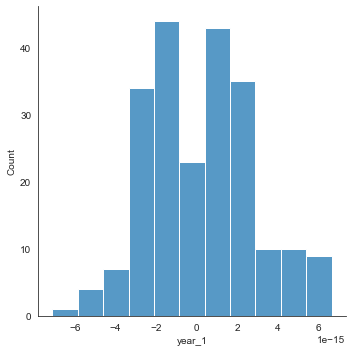

In [43]:
sns.displot(y_test-pred)

## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf=RandomForestRegressor(n_estimators=200)

In [46]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [47]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9997207489645651


In [48]:
rf_pred=rf.predict(X_test)

In [49]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 0.003646293261032986
Mean absolute error : 0.0003409090909090912
